In [12]:
a,b = map(float, ['1', '2'])


1.0


In [2]:
import os
import cv2
import numpy as np
from glob import glob
from albumentations import (
    Compose, HorizontalFlip, Rotate, RandomBrightnessContrast,
    RandomCrop, Resize
)


In [95]:
import os
import cv2
import numpy as np
from glob import glob
from albumentations import (
    Compose, HorizontalFlip, Rotate, RandomBrightnessContrast,
    RandomCrop, Resize
)

def cvt_yoloformat(xyxy,w,h):
    box_w = xyxy[2] - xyxy[0]
    box_h = xyxy[3] - xyxy[1]
    return [(xyxy[0] + box_w/2)/w ,(xyxy[1] + box_h/2)/h, box_w/w, box_h/h ]

def xywh2xyxy(xywh,w,h, rounding = True):
    if rounding:
        return [round((xywh[0] - xywh[2]/2) * w),round((xywh[1] - xywh[3]/2) * h),round((xywh[0] + xywh[2]/2) * w),round((xywh[1] + xywh[3]/2) * h)]
    else:
        return [(xywh[0] - xywh[2]/2) * w ,(xywh[1] - xywh[3]/2) * h ,(xywh[0] + xywh[2]/2) * w ,(xywh[1] + xywh[3]/2) * h]

def augment_data(img_path, label_path, save_path,n):
    # 이미지와 라벨링 파일 경로 불러오기
    img = cv2.imread(img_path)
    with open(label_path, 'r') as f:
        label = f.readlines()

    w, h = img.shape[1], img.shape[0]
    # 라벨링 파일 파싱해서 bbox 정보 추출하기
    bboxes = []
    clses = []
    for l in label:
        class_id, center_x, center_y, width, height = map(float, l.strip().split())
        bbox = [center_x, center_y, width, height]
        
        
        clses.append(int(class_id))
        bboxes.append(xywh2xyxy(bbox,w,h))

    np_bboxes = np.array(bboxes,dtype=np.float128)
    np_clses = np.array(clses)

    # print(np_bboxes)

    # augmentation 적용하기
    transform = Compose([
        HorizontalFlip(p=0.5),
        Rotate(limit=4, p=0.5),
        RandomBrightnessContrast(p=0.5),
        RandomCrop(height=img.shape[0], width=img.shape[1], p=0.5),
        Resize(height=img.shape[0], width=img.shape[1])
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['category_id']})
    for i in range(n):
        transformed = transform(image=img, bboxes=bboxes, category_id=clses)
        transformed_img = transformed['image']
        transformed_bboxes = transformed['bboxes']

        # 증강된 이미지와 라벨링 파일 저장하기
        cv2.imwrite(os.path.join(save_path + '/images', f"{os.path.basename(img_path)[:-4]}_{str(i)}.jpg") , transformed_img )
        with open(os.path.join(save_path + '/labels' , f"{os.path.splitext(os.path.basename(label_path))[0]}_{str(i)}.txt"), 'w') as f:
            for cls,bbox in zip(clses,transformed_bboxes):
                bbox = cvt_yoloformat(bbox,w,h)
                
                f.write(f"{cls} {bbox[0]:.6f} {bbox[1]:.6f} {bbox[2]:.6f} {bbox[3]:.6f}\n")
        
    
    return 0

from glob import glob

labels = glob('./labels/*')
imgs = glob('./images/*')

labels.sort()
imgs.sort()

for i in range(len(imgs)):
    augment_data(imgs[i],labels[i] ,'./augmented',5)
    


In [11]:
##
img_dir = '/media/tekim/tekim/datapython/modules/fire/red led warning light/warning_light'

save_dir = os.path.dirname(img_dir) + '/images'
save_txt_dir = os.path.dirname(img_dir) + '/labels'
imgs = glob(img_dir + '/*')

n = 5

# 증강할 함수 정의

# 증강된 이미지 저장하기
for i in imgs:

    ex = i[-4:]
    img = cv2.imread(i)



    for j in range(n):
        transform = Compose([
            HorizontalFlip(p=0.5),
            Rotate(limit=4, p=0.5),
            RandomBrightnessContrast(p=0.5),
            RandomCrop(height=img.shape[0], width=img.shape[1], p=0.5),
            Resize(height=img.shape[0], width=img.shape[1])
        ])

        augmented_image = transform(image=np.array(img))["image"]
        
        cv2.imwrite( filename=f"{save_dir}/{os.path.basename(i).split('.')[0]}_{j}.{os.path.basename(i)[-3:]}", img= augmented_image)
        with open(save_txt_dir + f"/{os.path.basename(i).split('.')[0]}_{j}.txt" ,'w' ) as f:
            f.write('')
        

In [81]:
list01 = [1,2,3]
list02 = [[3,2],[3,2],[4,5]]
for i,j in zip(list01, list02):
    print(i)
    print(j)

1
[3, 2]
2
[3, 2]
3
[4, 5]


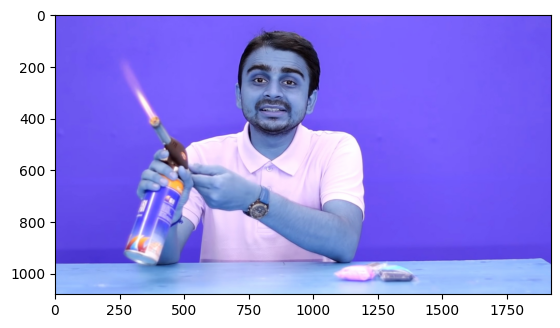

In [75]:
import os
import cv2
import numpy as np
from glob import glob
from albumentations import (
    Compose, HorizontalFlip, Rotate, RandomBrightnessContrast,
    RandomCrop, Resize
)

def augment_data(img_path, label_path, save_path):
    # 이미지와 라벨링 파일 경로 불러오기
    img = cv2.imread(img_path)
    with open(label_path, 'r') as f:
        label = f.readlines()

    # 라벨링 파일 파싱해서 bbox 정보 추출하기
    bboxes = []
    clses = []
    for l in label:
        class_id, center_x, center_y, width, height = map(float, l.strip().split())
        bbox = [center_x, center_y, width, height]

        clses.append(class_id)
        bboxes.append(bbox)
    np_bboxes = np.array(bboxes,dtype=np.float128)
    # np_clses = np.array(clses)

    # print(np_bboxes)

    # augmentation 적용하기
    transform = Compose([
        HorizontalFlip(p=0.5),
        Rotate(limit=20, p=0.5),
        RandomBrightnessContrast(p=0.5),
        RandomCrop(height=img.shape[0], width=img.shape[1], p=0.5),
        Resize(height=img.shape[0], width=img.shape[1])
    ], bbox_params={'format': 'yolo', 'label_fields': ['category_id']})
    
    transformed = transform(image=img, bboxes=bboxes, category_id=clses)
    transformed_img = transformed['image']
    transformed_bboxes = transformed['bboxes']
    # plt.imshow(img)
    plt.imshow(transformed_img)

from glob import glob
import matplotlib.pyplot as plt
labels = glob('./labels/*')
imgs = glob('./images/*')

labels.sort()
imgs.sort()

for i in range(len(imgs)):
    augment_data(imgs[i],labels[i] ,'./augmented')
    break


In [47]:
import torch
np.array(0.5283854166666666,dtype=np.float128)

array(0.52838542, dtype=float128)

In [15]:
import os
import cv2
import numpy as np
from glob import glob
from albumentations import (
    Compose, HorizontalFlip, Rotate, RandomBrightnessContrast,
    RandomCrop, Resize
)

def cvt_yoloformat(xyxy,w,h):
    box_w = xyxy[2] - xyxy[0]
    box_h = xyxy[3] - xyxy[1]
    return [(xyxy[0] + box_w/2)/w ,(xyxy[1] + box_h/2)/h, box_w/w, box_h/h ]

def xywh2xyxy(xywh,w,h, rounding = True):
    if rounding:
        return [round((xywh[0] - xywh[2]/2) * w),round((xywh[1] - xywh[3]/2) * h),round((xywh[0] + xywh[2]/2) * w),round((xywh[1] + xywh[3]/2) * h)]
    else:
        return [(xywh[0] - xywh[2]/2) * w ,(xywh[1] - xywh[3]/2) * h ,(xywh[0] + xywh[2]/2) * w ,(xywh[1] + xywh[3]/2) * h]

def augment_data(img_path, label_path, save_path):
    # 이미지와 라벨링 파일 경로 불러오기
    img = cv2.imread(img_path)
    with open(label_path, 'r') as f:
        label = f.readlines()

    h, w = img.shape[0],img.shape[1]

    # 라벨링 파일 파싱해서 bbox 정보 추출하기
    bboxes = []
    for l in label:
        class_id, center_x, center_y, width, height = map(float, l.strip().split())
        bbox = [center_x, center_y, width, height]
        bboxes.append(bbox)

    xyxy_bboxes = [xywh2xyxy(i,h,w) for i in bboxes]

    # augmentation 적용하기
    transform = Compose([
        HorizontalFlip(p=0.5),
        Rotate(limit=20, p=0.5),
        RandomBrightnessContrast(p=0.5),
        RandomCrop(height=img.shape[0], width=img.shape[1], p=0.5),
        Resize(height=img.shape[0], width=img.shape[1])
    ], bbox_params=bbox_params(format='pascal_voc'))

    

    transformed = transform(image=img, bboxes=xyxy_bboxes)
    transformed_img = transformed['image']
    transformed_bboxes = transformed['bboxes']

    # 증강된 이미지와 라벨링 파일 저장하기
    cv2.imwrite(os.path.join(save_path, f"{os.path.basename(img_path)}"), transformed_img)
    with open(os.path.join(save_path, f"{os.path.splitext(os.path.basename(label_path))[0]}.txt"), 'w') as f:
        for bbox in transformed_bboxes:
            xywh_box = cvt_yoloformat(transformed_bboxes,w,h)
            f.write(f"{str(class_id)} {bbox[0]:.6f} {bbox[1]:.6f} {bbox[2]:.6f} {bbox[3]:.6f}\n")

            # x_min = int((bbox[0] - bbox[2]/2) * transformed_img.shape[1])
            # y_min = int((bbox[1] - bbox[3]/2) * transformed_img.shape[0])
            # x_max = int((bbox[0] + bbox[2]/2) * transformed_img.shape[1])
            # y_max = int((bbox[1] + bbox[3]/2) * transformed_img.shape[0])
            # f.write(f"0 {bbox[0]:.6f} {bbox[1]:.6f} {bbox[2]:.6f} {bbox[3]:.6f}\n")

    return
from glob import glob

labels = glob('./labels/*')
imgs = glob('./images/*')

labels.sort()
imgs.sort()

for i in range(len(imgs)):
    augment_data(imgs[i],labels[i] ,'./augmented')


NameError: name 'A' is not defined